In [361]:
#import the random modules
import random
#import the Numpy Module
import numpy as np
import timeit
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
import requests

In [362]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.54 ms ± 7.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [363]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)
lat_lngs

In [364]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [365]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

516

In [366]:
#import the datetime module from the datetime library
from datetime import datetime

In [367]:
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [368]:
#create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrival")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1    

#loop through all the cities in our list

for i, city in enumerate(cities):
    

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrival
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | dargaville
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | beloha
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | lasa
Processing Record 11 of Set 1 | baykit
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | naze
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | kenai
Processing Record 20 of Set 1 | paamiut
Processing Record 21 of Set 1 | cardston
Processing Record 22 of Set 1 | new norfolk
Processing Re

Processing Record 37 of Set 4 | san patricio
Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | suntar
Processing Record 41 of Set 4 | cape town
Processing Record 42 of Set 4 | san gabriel
Processing Record 43 of Set 4 | san luis
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | vostok
Processing Record 46 of Set 4 | havelock
Processing Record 47 of Set 4 | faya
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | yining
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | te anau
Processing Record 2 of Set 5 | porto walter
Processing Record 3 of Set 5 | waw
Processing Record 4 of Set 5 | mahajanga
Processing Record 5 of Set 5 | nam tha
City not found. Skipping...
Processing Record 6 of Set 5 | kiunga
Processing Record 7 of Set 5 | tasiilaq
Processing Record 8 of Set 5 | gat
Processing Record 9 of Set 5 | port-gentil
Processing Record 10 of Set 5 | guerrero n

Processing Record 34 of Set 8 | ilulissat
Processing Record 35 of Set 8 | marcona
City not found. Skipping...
Processing Record 36 of Set 8 | eten
Processing Record 37 of Set 8 | huarmey
Processing Record 38 of Set 8 | tadine
Processing Record 39 of Set 8 | chuchkovo
Processing Record 40 of Set 8 | pokrovskoye
Processing Record 41 of Set 8 | yerofey pavlovich
Processing Record 42 of Set 8 | mnogovershinnyy
Processing Record 43 of Set 8 | brejo santo
Processing Record 44 of Set 8 | usinsk
Processing Record 45 of Set 8 | ayan
Processing Record 46 of Set 8 | lakes entrance
Processing Record 47 of Set 8 | mahebourg
Processing Record 48 of Set 8 | antalaha
Processing Record 49 of Set 8 | peyima
Processing Record 50 of Set 8 | flinders
Processing Record 1 of Set 9 | barcelona
Processing Record 2 of Set 9 | nagua
Processing Record 3 of Set 9 | fare
Processing Record 4 of Set 9 | luanda
Processing Record 5 of Set 9 | kirakira
Processing Record 6 of Set 9 | schwabmunchen
Processing Record 7 of 

In [369]:
len(city_data)

476

In [370]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,36.00,100,90,9.22,CA,2021-01-14 21:23:39
1,Dargaville,-35.9333,173.8833,70.03,65,4,5.86,NZ,2021-01-14 21:23:40
2,Ushuaia,-54.8000,-68.3000,53.60,58,20,3.44,AR,2021-01-14 21:21:01
3,Beloha,-25.1667,45.0500,75.56,87,7,9.26,MG,2021-01-14 21:23:40
4,Kapaa,22.0752,-159.3190,77.00,78,90,10.36,US,2021-01-14 21:23:40


In [371]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Torbay,90,CA,2021-01-14 21:23:39,100,47.6666,-52.7314,36.00,9.22
1,Dargaville,4,NZ,2021-01-14 21:23:40,65,-35.9333,173.8833,70.03,5.86
2,Ushuaia,20,AR,2021-01-14 21:21:01,58,-54.8000,-68.3000,53.60,3.44
3,Beloha,7,MG,2021-01-14 21:23:40,87,-25.1667,45.0500,75.56,9.26
4,Kapaa,90,US,2021-01-14 21:23:40,78,22.0752,-159.3190,77.00,10.36


In [372]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

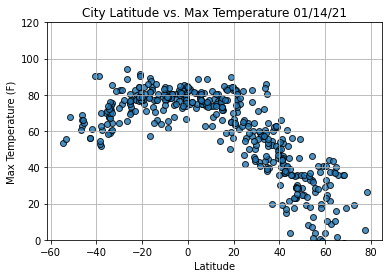

In [373]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

#build the scatter plot for lattidue vs. max temp
plt.scatter(lats, max_temps, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities" )

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.ylim(0, 120)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")


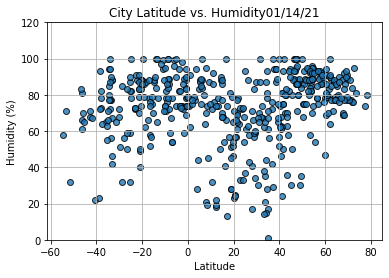

In [374]:
##build the scatter plot for lattidue vs. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidth = 1, marker = "o",alpha = 0.8, label = "Cities")

#add extra feature to the graph
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.ylim(0, 120)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")


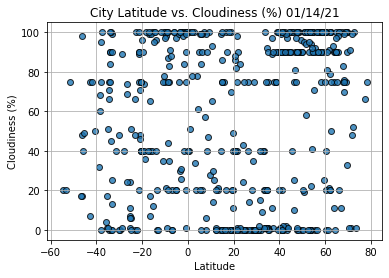

In [375]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

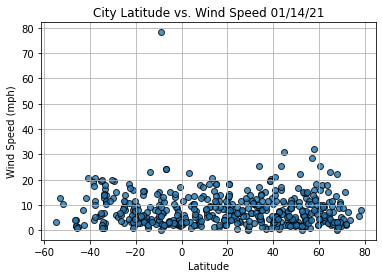

In [376]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [377]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [378]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylit'

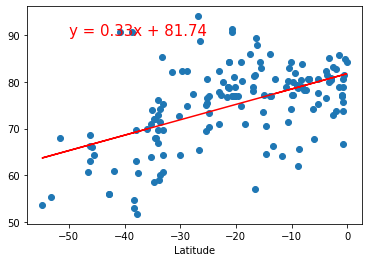

In [380]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))